In [3]:
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# Gaussian Processes in Numpy

Gaussian Processes is the optimal approach to modeling uncertainty in machine learning (Murphy, 2012). GPs model distributions over function given the observed data:

\begin{align}
  f(x) \sim GP(m(\mathbf{x}),\; \kappa(\mathbf{x},\mathbf{x^{'}}))   
\end{align}

For each feature space location we define a Gaussian prior distribution with mean $m(\mathbf{x})$ and variance $\kappa(\mathbf{x},\mathbf{x^{}})$. However, as we are modeling continuous functions, function value in contiguous locations must be related to each other. Therefore we should also define the covariance between different locations. The covariance is modeled through a kernel function that should be also defined as a prior.

\begin{align}
\mathrm{cov}[f_i, f_j] = k(\mathbf{x}^{(i)}, \mathbf{x}^{(j)}) = \exp(-\|\mathbf{x}^{(i)}-\mathbf{x}^{(j)}\|^2)
\end{align}

In order to define a Gaussian distribution the kernel must be positive semi-definite. One possible choice is to use a Gaussian Kernels as above.

In [2]:
# Define a kernel
mu= np.zeros(100)
xx=np.arange(0,1,0.01)
l=len(xx)
def kernel(x,y):
    lx=len(x)
    ly=len(y)
    k= np.zeros([lx,ly])
    for i in range(lx):
        for j in range(ly):
            k[i,j]= np.exp(-np.linalg.norm((x[i]-y[j]))**2)
    return k

k=kernel(xx,xx)     

Once we have our GP prior we can sample functions from it as in the example below (we used $\mathbf{0}$ as prior mean): 

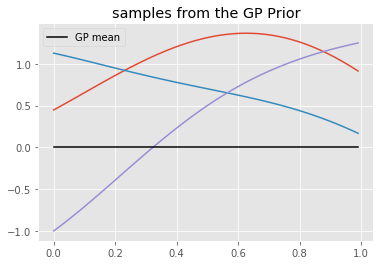

In [17]:
# Sample data
sample_one=np.random.multivariate_normal(mu,k,3)  
x_obs=[0.4,0.9,0.65]
y_obs=[1,2,1.5]

plt.plot(xx,sample_one[0,:])
plt.plot(xx,sample_one[1,:])
plt.plot(xx,sample_one[2,:])
#plt.plot(x_obs,y_obs,"x",label="observations")
plt.plot(xx,mu,"-",color="black",label="GP mean")
plt.title("samples from the GP Prior")
plt.legend()
plt.show()

## Posterior

The joint distribution between functions in observed locations $\mathbf{x}$ and test locations $\mathbf{x_*}$ can be expressed as:

\begin{align}
p\left(
\left[ \begin{array}{cc}
    f \\
    f_* \\
    \end{array}
    \right] \right) =\, \mathcal{N}\left(
% variables
\left[ \begin{array}{cc}
    f \\
    f_* \\
    \end{array}
    \right];\;
% mu
\left[ \begin{array}{cc}
    \mu \\
    \mu_* \\
    \end{array}
    \right],
% Sigma
    \left[ \begin{array}{cc}
    K(X,X)  & K(X,X_*) \\
    K(X_*,X) & K(X_*,X_*) \\
    \end{array}
    \right]
\right),
\end{align}

The conditional can be computed via standard multivariate Gaussians rules as:
\begin{align}
    p(f_* | f, X,X_*) &= \mathcal{N}(f_*; \mu_*, \Sigma_*)  
\end{align}

where:
\begin{align}
    \mu_* &= \mu(X_*) + K(X_*,X)K(X,X)^{-1}(f-\mu(X))\\
    \Sigma_* &= K(X_*,X_*) - K(X_*,X)(K(X,X))^{-1}K(X,X_*)
\end{align}

In [12]:
x_test= x_obs
x_samp=np.linspace(0,1,100)
y=y_obs
var_y=0.01

# Compute posterior
mu_post=kernel(x_samp,x_test).dot( np.linalg.inv(kernel(x_test,x_test) + 
                                                 var_y*np.identity(len(x_test)))).dot(y) 
cov_post= kernel(x_samp,x_samp)-kernel(x_samp,x_test).dot(np.linalg.inv(kernel(x_test,x_test)+
                                                                        var_y*np.identity(len(x_test)))).dot(kernel(x_test,x_samp)) 

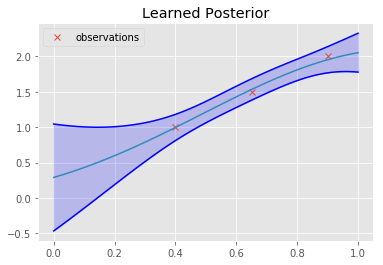

In [30]:
variance= np.diag(cov_post)
std=np.sqrt(variance)

plt.plot(x_obs,y_obs,"x",label="observations")

plt.plot(x_samp,mu_post)
plt.plot(x_samp,mu_post+2*std,color="b")
plt.plot(x_samp,mu_post-2*std,color="b")
plt.fill_between(x_samp,mu_post+2*std,mu_post-2*std,color = "blue", alpha=0.2)
plt.title("Learned Posterior")
plt.legend()

plt.show()